In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import folium.plugins as plugins

In [36]:
df=pd.read_csv('listings.csv')

G:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# df=df.drop('listing_url',axis=1)
# df=df.drop('scrape_id',axis=1)
# df=df.drop('last_scraped',axis=1)
# df=df.drop('summary',axis=1)
# df=df.drop('description',axis=1)
# df=df.drop('experiences_offered',axis=1)
# df=df.drop('neighborhood_overview',axis=1)
# df=df.drop('notes',axis=1)
# df=df.drop('transit',axis=1)
# df=df.drop('access',axis=1)
# df=df.drop('interaction',axis=1)
# df=df.drop('house_rules',axis=1)
# df=df.drop('thumbnail_url',axis=1)
# df=df.drop('medium_url',axis=1)
# df=df.drop('picture_url',axis=1)
# df=df.drop('xl_picture_url',axis=1)

In [28]:
# df=df.drop('host_name',axis=1)
# df=df.drop('host_url',axis=1)
# df=df.drop('host_about',axis=1)
# df=df.drop('host_response_time',axis=1)
# df=df.drop('host_response_rate',axis=1)
# df=df.drop('host_acceptance_rate',axis=1)
# df=df.drop('host_thumbnail_url',axis=1)
# df=df.drop('host_picture_url',axis=1)
# df=df.drop('host_verifications',axis=1)
# df=df.drop('host_has_profile_pic',axis=1)
# df=df.drop('host_identity_verified',axis=1)

In [29]:
df=df[df['neighbourhood_group_cleansed']=='Manhattan']
df=df[['host_is_superhost','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','cancellation_policy','latitude','longitude']]

In [30]:
df.head()

host_is_superhost neighbourhood_cleansed property_type        room_type  \
1                  t                 Harlem     Apartment     Private room   
3                  f                Midtown     Apartment  Entire home/apt   
7                  f                 Harlem     Apartment     Private room   
10                 f            East Harlem     Apartment  Entire home/apt   
11                 f         Hell's Kitchen     Apartment     Private room   

    accommodates  bathrooms  bedrooms  beds    price  \
1              3        1.0       1.0   3.0   $59.00   
3              2        1.0       0.0   1.0  $225.00   
7              2        1.0       1.0   1.0  $150.00   
10             1        1.0       NaN   1.0   $80.00   
11             1        1.0       1.0   1.0   $52.00   

            cancellation_policy   latitude  longitude  
1   strict_14_with_grace_period  40.799205 -73.953676  
3   strict_14_with_grace_period  40.753621 -73.983774  
7   strict_14_with_grace_period  40.809018 -73.941902  
10  strict_14_with_grace_period  40.798514 -73.943991  
11  strict_14_with_grace_period  40.759786 -73.991193

In [31]:
df.describe()

accommodates     bathrooms      bedrooms          beds      latitude  \
count  23491.000000  23444.000000  23466.000000  23467.000000  23491.000000   
mean       2.905921      1.122142      1.118981      1.559594     40.765017   
std        1.793561      0.381447      0.747574      0.988931      0.037877   
min        1.000000      0.000000      0.000000      0.000000     40.701571   
25%        2.000000      1.000000      1.000000      1.000000     40.732219   
50%        2.000000      1.000000      1.000000      1.000000     40.760843   
75%        4.000000      1.000000      1.000000      2.000000     40.794676   
max       16.000000      6.500000      8.000000     16.000000     40.876646   

          longitude  
count  23491.000000  
mean     -73.974544  
std        0.021748  
min      -74.018449  
25%      -73.991465  
50%      -73.980381  
75%      -73.954207  
max      -73.908550

In [32]:
df=df.dropna(how='any')

In [33]:
# prepare latitude and longitude data per trip per hour
data=list()

data.append([[df.iloc[j]['latitude'],df.iloc[j]['longitude']]for j in range(len(df))])

weight = 1  # default value
for time_entry in data:
    for row in time_entry:
        row.append(weight)

In [38]:
m = folium.Map([40.7204, -73.9280], tiles='stamentoner', zoom_start=12)

hm = plugins.HeatMapWithTime(data)

hm.add_to(m)

m

Text(0.5,1,'Distribution of listing prices')

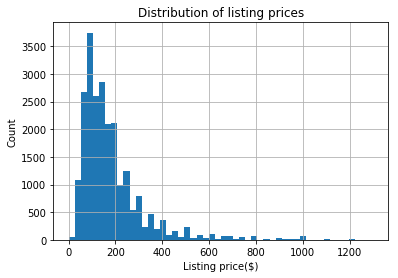

In [14]:
df['price'].hist(bins=50,range=(0,1300))
plt.ylabel('Count')
plt.xlabel('Listing price($)')
plt.title('Distribution of listing prices')

Text(0.5,1,'Distribution of listing prices')

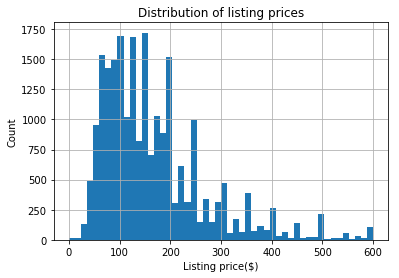

In [15]:
df['price'].hist(bins=50,range=(0,600))
plt.ylabel('Count')
plt.xlabel('Listing price($)')
plt.title('Distribution of listing prices')

Text(0.5,0,'Listing price($)')

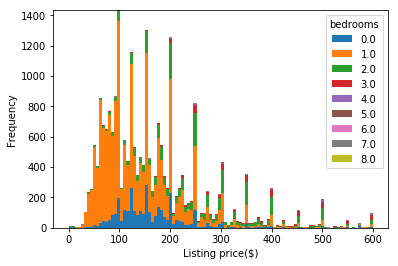

In [16]:
df.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=100,range=(0,600))
plt.xlabel('Listing price($)')

Text(0.5,0,'Listing price($)')

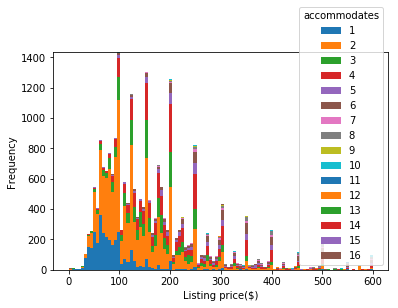

In [17]:
df.pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=100,range=(0,600))
plt.xlabel('Listing price($)')

Text(0.5,1,'No. of bedrooms vs price')

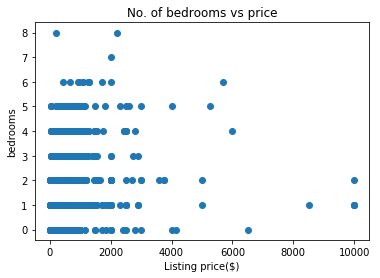

In [18]:
plt.scatter(df['price'],df['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price($)')
plt.title('No. of bedrooms vs price')

# Defining a Function to Calculate the Adjusted  R2 

In [263]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# Simple Regression

In [264]:
df=df[df['price']<2000]

In [276]:
evaluation=pd.DataFrame(columns=["Model","Mean Squared Error","R-squared-training","Adjusted R-squared-training","R-squared-test","Adjusted R-squared-test"])

In [266]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lr
from sklearn import metrics

In [277]:
train_data,test_data = train_test_split(df,train_size = 0.7,random_state=0)

lr = lr.LinearRegression()
X_train = np.array(train_data['bedrooms'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['bedrooms'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(lr.score(X_train, y_train),'.3f')
rtesm = format(lr.score(X_test, y_test),'.3f')

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Regression',msesm,rtrsm,'-',rtesm,'-']
evaluation

Average Price for Test Data: 184.214
Intercept: 88.28754830116813
Coefficient: [85.99779918]


/Users/chenyichang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model Mean Squared Error R-squared-training  \
0  Simple Regression            145.643              0.169   

  Adjusted R-squared-training R-squared-test Adjusted R-squared-test  
0                           -          0.179                       -

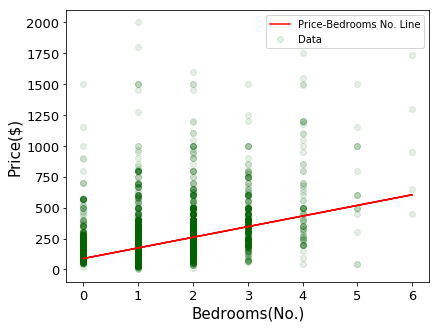

In [268]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Price-Bedrooms No. Line")
plt.xlabel("Bedrooms(No.)", fontsize=15)
plt.ylabel("Price($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

# Multiple regression

<li>Pearson Correlation Matrix</li>
<ul>
<li>If a feature does not improve your model a lot, not adding it may be a better choice. Besides, when it comes to correlation, if there is very high correlation between two features, then keeping both of them is not a good idea most of the time. 

In [214]:
df.head()

host_is_superhost neighbourhood_cleansed property_type        room_type  \
1                  t                 Harlem     Apartment     Private room   
3                  f                Midtown     Apartment  Entire home/apt   
7                  f                 Harlem     Apartment     Private room   
11                 f         Hell's Kitchen     Apartment     Private room   
13                 t           East Village     Apartment     Private room   

    accommodates  bathrooms  bedrooms  beds  price  \
1              3        1.0       1.0   3.0   59.0   
3              2        1.0       0.0   1.0  225.0   
7              2        1.0       1.0   1.0  150.0   
11             1        1.0       1.0   1.0   52.0   
13             2        1.0       1.0   1.0   80.0   

            cancellation_policy  
1   strict_14_with_grace_period  
3   strict_14_with_grace_period  
7   strict_14_with_grace_period  
11  strict_14_with_grace_period  
13  strict_14_with_grace_period

In [269]:
df['host_is_superhost']=np.where(df['host_is_superhost']=='t',1,0)

#Set dummy variables of property type. The remaining type includes hotel, Resort and so on...(<10%)
df['if Apartment']=np.where(df['property_type']=='Apartment',1,0)
df['if House']=np.where(df['property_type']=='House',1,0)
df['if Loft']=np.where(df['property_type']=='Loft',1,0)

#Set dummy variables of room type. The remaining room type is shared room.
df['if Private room']=np.where(df['room_type']=='Private room',1,0)
df['if Entire home/apt']=np.where(df['room_type']=='Entire home/apt',1,0) 

# Set numerical variable for cancellation_policy accoring to cancellation flexibility
def cancellation_score(x):
    if x=='strict':
        return 0
    elif x=='super_strict_60':
        return 1
    elif x=='super_strict_30':
        return 2
    elif x=='strict_14_with_grace_period':
        return 3
    elif x=='moderate':
        return 4
    elif x=='flexible':
        return 5
df['cancellation_score']=df['cancellation_policy'].apply(lambda x:cancellation_score(x))

# Combine neighbors into 7 major districts
def district(neigh):
    if neigh in {'Harlem','East Harlem','Inwood','Washington Heights','Morningside Heights','Marble Hill'}:
        return 'Upper Manhattan'
    elif neigh in {'Upper West Side'}:
        return 'Upper West Manhattan'
    elif neigh in {'Upper East Side','Roosevelt Island'}:
        return 'Upper East Manhattan'
    elif neigh in {"Hell's Kitchen",'Chelsea','Theater District'}:
        return 'Mid West Manhattan'
    elif neigh in {'Midtown','Flatiron District'}:
        return 'Mid Manhattan'
    elif neigh in {'Murray Hill','Kips Bay','Gramercy','Stuyvesant Town'}:
        return 'Mid East Manhattan'
    else:
        return 'Lower Manhattan'

df['district']=df['neighbourhood_cleansed'].apply(lambda x:district(x))
# Set dummy variables for districts.
df['if Upper Manhattan']=np.where(df['district']=='Upper Manhattan',1,0)
df['if Upper East Manhattan']=np.where(df['district']=='Upper East Manhattan',1,0)
df['if Mid West Manhattan']=np.where(df['district']=='Mid West Manhattan',1,0)
df['if Mid Manhattan']=np.where(df['district']=='Mid Manhattan',1,0)
df['if Mid East Manhattan']=np.where(df['district']=='Mid East Manhattan',1,0)
df['if Lower Manhattan']=np.where(df['district']=='Lower Manhattan',1,0)

In [16]:
df.head()

host_is_superhost neighbourhood_cleansed property_type        room_type  \
1                   1                 Harlem     Apartment     Private room   
3                   0                Midtown     Apartment  Entire home/apt   
7                   0                 Harlem     Apartment     Private room   
11                  0         Hell's Kitchen     Apartment     Private room   
13                  1           East Village     Apartment     Private room   

    accommodates  bathrooms  bedrooms  beds  price  \
1              3        1.0       1.0   3.0   59.0   
3              2        1.0       0.0   1.0  225.0   
7              2        1.0       1.0   1.0  150.0   
11             1        1.0       1.0   1.0   52.0   
13             2        1.0       1.0   1.0   80.0   

            cancellation_policy         ...          if Private room  \
1   strict_14_with_grace_period         ...                        1   
3   strict_14_with_grace_period         ...                        0   
7   strict_14_with_grace_period         ...                        1   
11  strict_14_with_grace_period         ...                        1   
13  strict_14_with_grace_period         ...                        1   

    if Entire home/apt  cancellation_score            district  \
1                    0                   3     Upper Manhattan   
3                    1                   3       Mid Manhattan   
7                    0                   3     Upper Manhattan   
11                   0                   3  Mid West Manhattan   
13                   0                   3     Lower Manhattan   

    if Upper Manhattan  if Upper East Manhattan if Mid West Manhattan  \
1                    1                        0                     0   
3                    0                        0                     0   
7                    1                        0                     0   
11                   0                        0                     1   
13                   0                        0                     0   

    if Mid Manhattan  if Mid East Manhattan  if Lower Manhattan  
1                  0                      0                   0  
3                  1                      0                   0  
7                  0                      0                   0  
11                 0                      0                   0  
13                 0                      0                   1  

[5 rows x 23 columns]

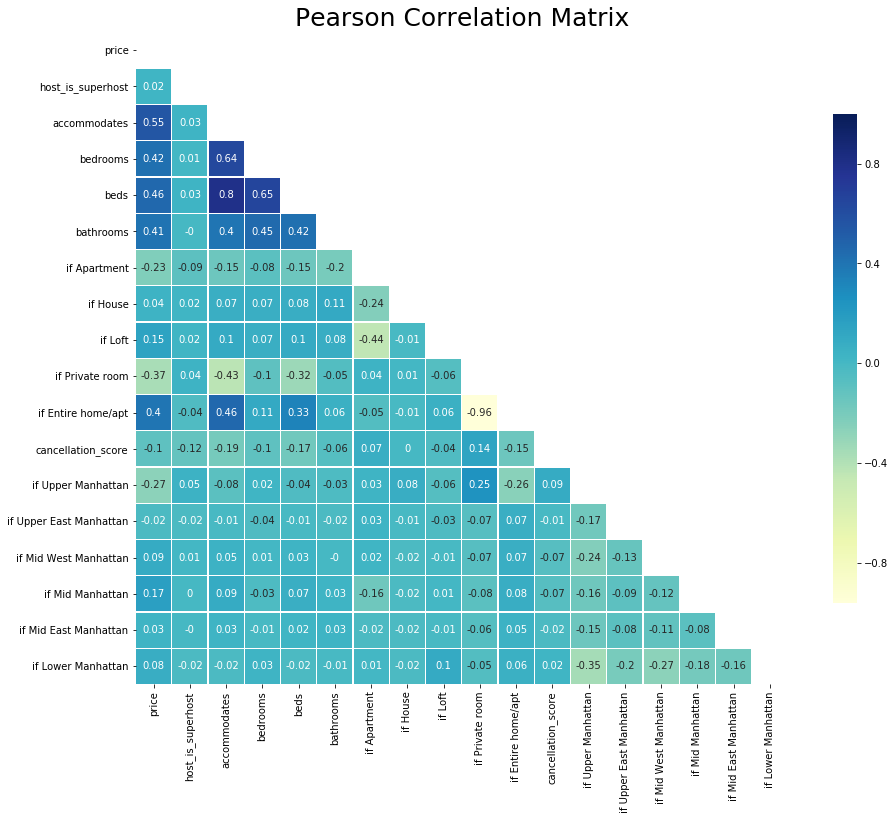

In [270]:
features = ['price',
'host_is_superhost',
'accommodates',
'bedrooms',
'beds',
'bathrooms',
'if Apartment',
'if House',
'if Loft',
'if Private room',
'if Entire home/apt',
'cancellation_score',
'if Upper Manhattan',
'if Upper East Manhattan',
'if Mid West Manhattan',
'if Mid Manhattan',
'if Mid East Manhattan',
'if Lower Manhattan']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr().round(2),linewidths=0.25,vmax=1.0,square=True,cmap="YlGnBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})

# Complex Model

<li>boxplot

[Text(0,0.5,'Price'), Text(0.5,0,'Accommodates')]

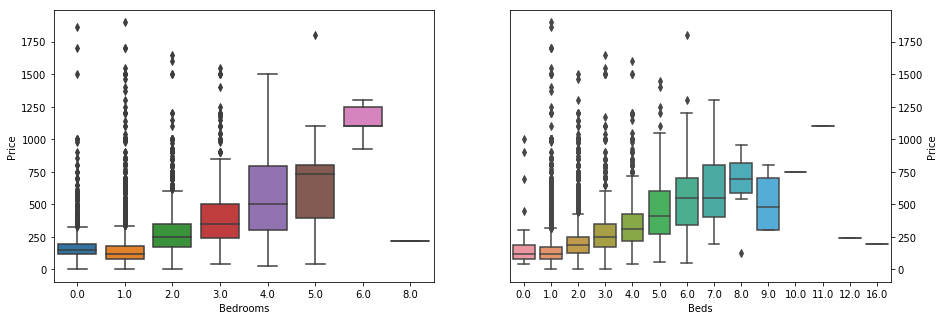

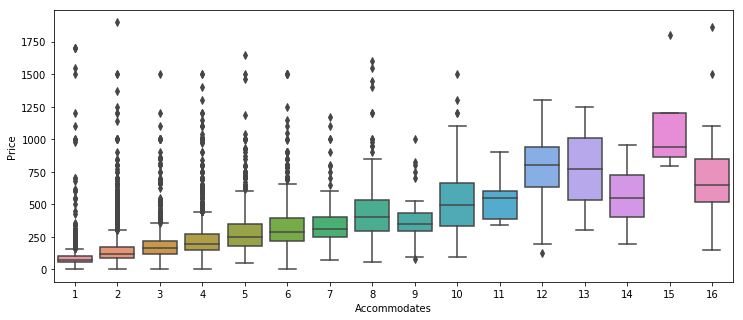

In [271]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'], ax=axes[0])
sns.boxplot(x=train_data['beds'],y=train_data['price'], ax=axes[1])
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Beds', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=train_data['accommodates'],y=train_data['price'], ax=axe)
axe.set(xlabel='Accommodates', ylabel='Price')

In [272]:
from mpl_toolkits.mplot3d import Axes3D

[Text(0.5,0,'\nAccommodates'), Text(0.5,0,'\nBeds'), Text(0.5,0,'\nBedrooms')]

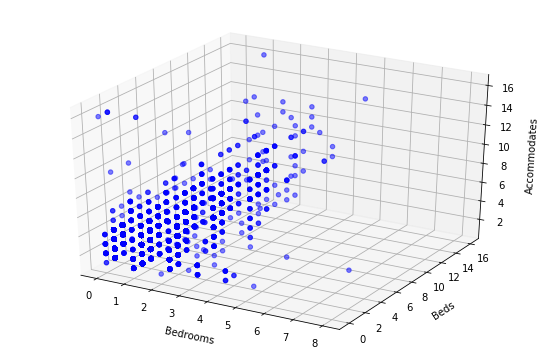

In [273]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train_data['bedrooms'],train_data['beds'],train_data['accommodates'],c="blue",alpha=.5)
ax.set(xlabel='\nBedrooms',ylabel='\nBeds',zlabel='\nAccommodates')

<li>delete beds

In [278]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lr
from sklearn import metrics

train_data,test_data = train_test_split(df,train_size = 0.7,random_state=0)
features1 = [
'host_is_superhost',
'accommodates',
'bedrooms',
'bathrooms',
'if Apartment',
'if House',
'if Loft',
'if Private room',
'if Entire home/apt',
'cancellation_score',
'if Upper Manhattan',
'if Upper East Manhattan',
'if Mid West Manhattan',
'if Mid Manhattan',
'if Mid East Manhattan',
'if Lower Manhattan']

x_train = train_data[features1]
y_train = train_data['price']
x_test = test_data[features1]
y_test = test_data['price']

complex_model_1 = lr.LinearRegression()
complex_model_1.fit(x_train,y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred1 = complex_model_1.predict(x_test)
msecm1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f')
rtrcm1 = format(complex_model_1.score(x_train,y_train),'.3f')
artrcm1 = format(adjustedR2(complex_model_1.score(x_train,y_train),train_data.shape[0],len(features1)),'.3f')
rtecm1 = format(complex_model_1.score(x_test,y_test),'.3f')
artecm1 = format(adjustedR2(complex_model_1.score(x_test,y_test),test_data.shape[0],len(features1)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Complex Model',msecm1,rtrcm1,artrcm1,rtecm1,artecm1 ]
evaluation

Intercept: -44.74525299505541
Coefficients: [  6.76036992  21.72878604  29.83455498  83.68192204 -52.38883923
 -43.02666755  34.09563484  19.19921611  82.80093744   5.95285694
 -47.60977126  -2.61460376  31.75819933  64.25665971  11.25294554
  17.16482652]


/Users/chenyichang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model Mean Squared Error R-squared-training  \
0  Simple Regression            145.643              0.169   
1      Complex Model            118.586              0.446   

  Adjusted R-squared-training R-squared-test Adjusted R-squared-test  
0                           -          0.179                       -  
1                       0.446          0.456                   0.455

In [279]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
regressor_OLS = sm.OLS(y_train, x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     822.9
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:33:59   Log-Likelihood:            -1.0061e+05
No. Observations:               16342   AIC:                         2.013e+05
Df Residuals:                   16325   BIC:                         2.014e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -44.7453      9.214     -4.856      0.000     -62.806     -26.685
host_is_superhost           6.7604      2.612      2.588      0.010       1.641      11.880
accommodates               21.7288      0.796     27.306      0.000      20.169      23.289
bedrooms                   29.8346      1.701     17.537      0.000      26.500      33.169
bathrooms                  83.6819      2.804     29.841      0.000      78.185      89.179
if Apartment              -52.3888      3.481    -15.051      0.000     -59.211     -45.566
if House                  -43.0267     11.230     -3.831      0.000     -65.039     -21.014
if Loft                    34.0956      6.882      4.954      0.000      20.606      47.585
if Private room            19.1992      6.391      3.004      0.003       6.672      31.727
if Entire home/apt         82.8009      6.459     12.820      0.000      70.141      95.460
cancellation_score          5.9529      1.036      5.746      0.000       3.922       7.984
if Upper Manhattan        -47.6098      3.485    -13.660      0.000     -54.441     -40.778
if Upper East Manhattan    -2.6146      4.201     -0.622      0.534     -10.849       5.620
if Mid West Manhattan      31.7582      3.708      8.565      0.000      24.490      39.026
if Mid Manhattan           64.2567      4.378     14.679      0.000      55.676      72.837
if Mid East Manhattan      11.2529      4.609      2.441      0.015       2.218      20.288
if Lower Manhattan         17.1648      3.374      5.087      0.000      10.551      23.779
==============================================================================
Omnibus:                    15239.207   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1029960.386
Skew:                           4.339   Prob(JB):                         0.00
Kurtosis:                      40.912   Cond. No.                         73.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

In [ ]:
features2 = ['bedrooms','beds','accommodates','if Apartment','if House','if Private room','if Entire home/apt']

In [ ]:
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.fit_transform(test_data[features2])
poly = lr.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly1 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
rtepoly1 = format(poly.score(X_testpoly,test_data['price']),'.3f')

polyfeat = PolynomialFeatures(degree=3)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.fit_transform(test_data[features2])
poly = lr.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly2 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly2 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
rtepoly2 = format(poly.score(X_testpoly,test_data['price']),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','degree=2',msepoly1,rtrpoly1,'-',rtepoly1,'-']
evaluation.loc[r+1] = ['Polynomial Regression','degree=3',msepoly2,rtrpoly2,'-',rtepoly2,'-']
evaluation.sort_values(by = 'R-squared-test', ascending=False)

# Cleaning Data & Combining District

In [1]:
import sklearn

In [2]:
def district(neigh):
    if neigh in {'Harlem','East Harlem','Inwood','Washington Heights','Morningside Heights','Marble Hill'}:
        return 'Upper Manhattan'
    elif neigh in {'Upper West Side'}:
        return 'Upper West Manhattan'
    elif neigh in {'Upper East Side','Roosevelt Island'}:
        return 'Upper East Manhattan'
    elif neigh in {"Hell's Kitchen",'Chelsea','Theater District'}:
        return 'Mid West Manhattan'
    elif neigh in {'Midtown','Flatiron District'}:
        return 'Mid Manhattan'
    elif neigh in {'Murray Hill','Kips Bay','Gramercy','Stuyvesant Town'}:
        return 'Mid East Manhattan'
    else:
        return 'Lower Manhattan'

In [4]:
import pandas as pd
df = pd.read_csv('/Users/dingranlu/Documents/E4523/Airbnb/listings.csv', encoding = "ISO-8859-1")
df = df[df['neighbourhood_group_cleansed'] == 'Manhattan']
df['neighbourhood'] = df['neighbourhood_cleansed'].apply(district)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def cancellation_score(x):
    if x=='strict':
        return 0
    elif x=='super_strict_60':
        return 1
    elif x=='super_strict_30':
        return 2
    elif x=='strict_14_with_grace_period':
        return 3
    elif x=='moderate':
        return 4
    elif x=='flexible':
        return 5
df['cancellation_score']=df['cancellation_policy'].apply(lambda x:cancellation_score(x))

In [6]:
df = df[['neighbourhood','property_type','room_type','accommodates','bedrooms','bathrooms','instant_bookable','cancellation_score','price']]

In [7]:
var = ['neighbourhood','property_type','room_type','instant_bookable']
df_ = pd.get_dummies(df, columns = var)
df_=df_.dropna()

In [8]:
columns = ['accommodates', 'bedrooms', 'bathrooms',
           'neighbourhood_Lower Manhattan', 'neighbourhood_Mid East Manhattan',
           'neighbourhood_Mid Manhattan', 'neighbourhood_Mid West Manhattan',
           'neighbourhood_Upper East Manhattan', 'neighbourhood_Upper Manhattan',
           'neighbourhood_Upper West Manhattan', 'property_type_Aparthotel',
           'property_type_Apartment', 'property_type_Bed and breakfast',
           'property_type_Boutique hotel', 'property_type_Condominium',
           'property_type_Guest suite', 'property_type_Hostel',
           'property_type_House', 'property_type_Loft', 'property_type_Other',
           'property_type_Resort', 'property_type_Serviced apartment',
           'property_type_Tiny house', 'property_type_Townhouse',
           'property_type_Villa', 'room_type_Entire home/apt',
           'room_type_Private room', 'room_type_Shared room', 'instant_bookable_f',
           'instant_bookable_t', 'cancellation_score', 'price']
df_ = df_[columns]

Text(0.5,1,'Histogram')

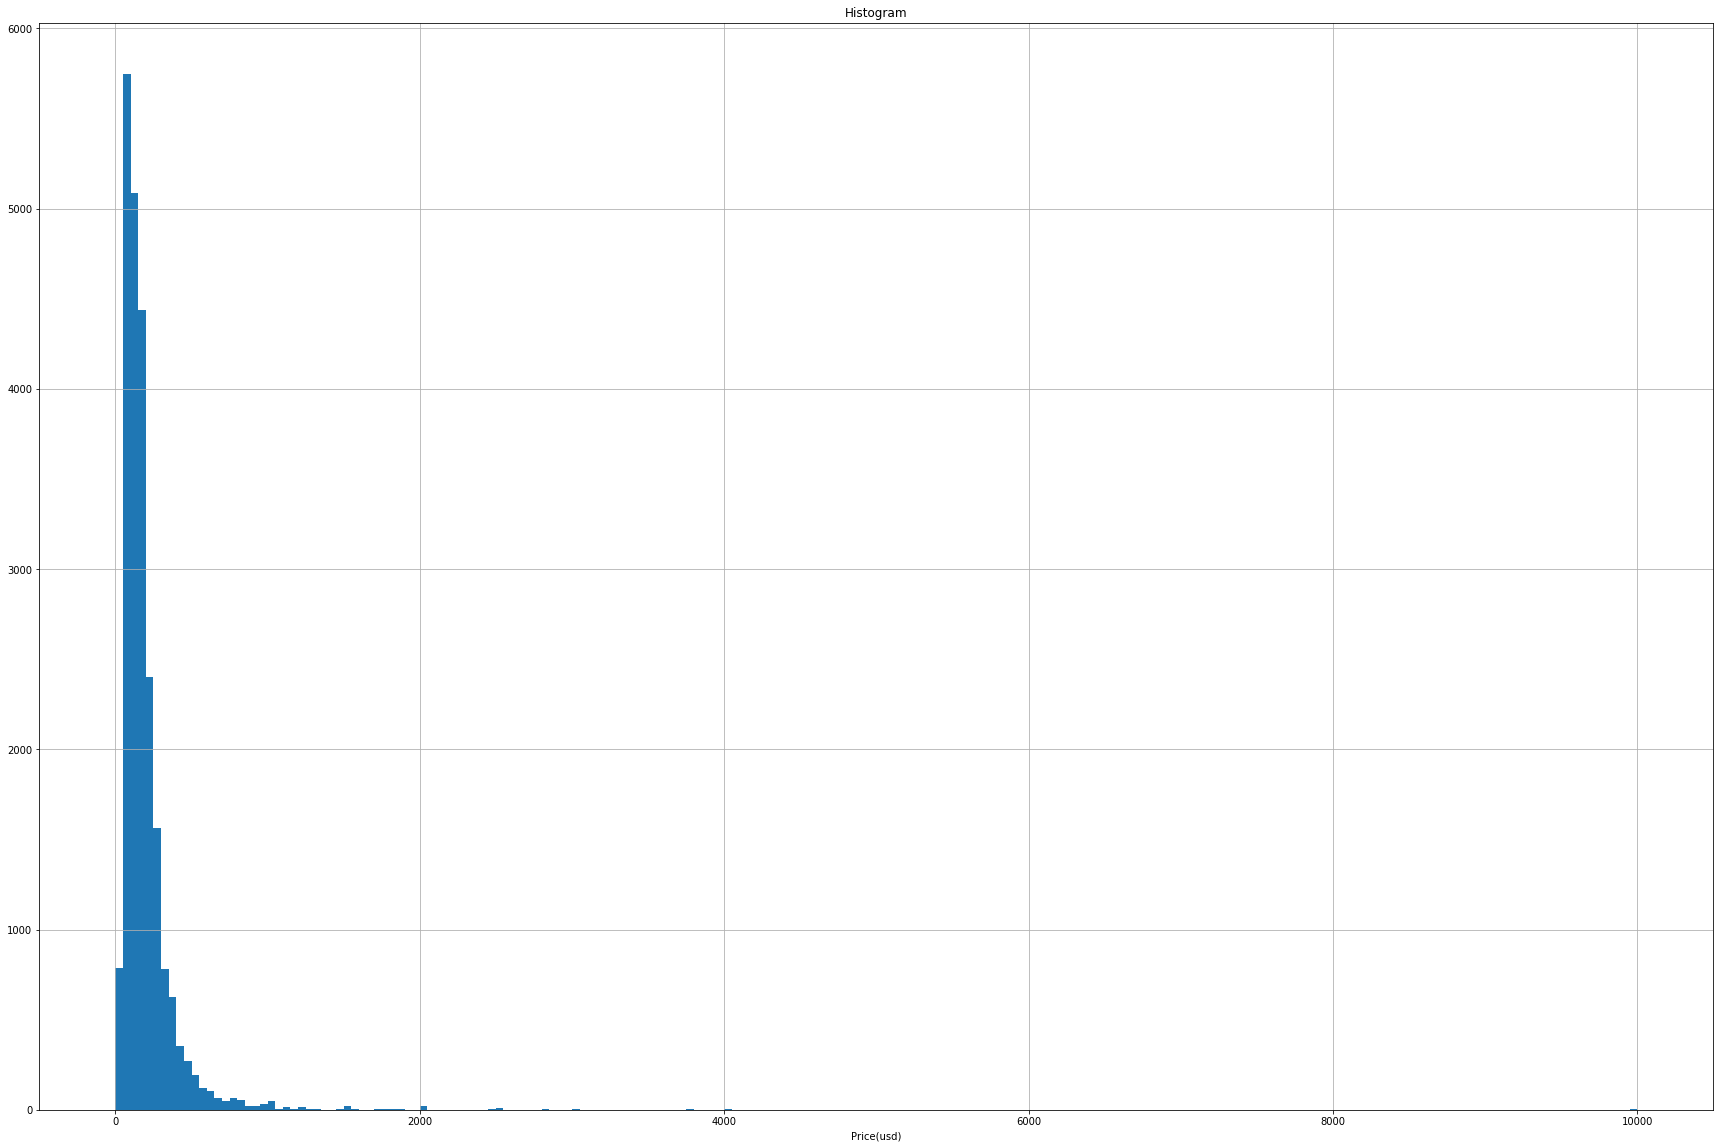

In [10]:
import matplotlib.pyplot as plt
df_.price.hist(bins=200, figsize=(30,20))
plt.xlabel('Price(usd)')
plt.title('Histogram')

In [11]:
df_ = df_[df_['price'] <= 2000]

# Regressor Tree

In [12]:
from sklearn.model_selection import train_test_split
train_1, test_1 = train_test_split(df_, test_size = 0.3)
x_train_1 = train_1.iloc[0:,0:31]
y_train_1 = train_1[['price']]
x_test_1 = test_1.iloc[0:,0:31]
y_test_1 = test_1[['price']]

Maximum depth: 1
Training R-Square 0.17673122974812427
Testing R-Square 0.19150790856271716
Maximum depth: 2
Training R-Square 0.3219255414517972
Testing R-Square 0.34045074717723034
Maximum depth: 3
Training R-Square 0.37717199240862964
Testing R-Square 0.39039136095219507
Maximum depth: 4
Training R-Square 0.42535320877952076
Testing R-Square 0.4106549202060664
Maximum depth: 5
Training R-Square 0.45885950311493007
Testing R-Square 0.4375633076854876
Maximum depth: 6
Training R-Square 0.4845795980592793
Testing R-Square 0.4499122208874631
Maximum depth: 7
Training R-Square 0.5122174905849711
Testing R-Square 0.46072901737219485
Maximum depth: 8
Training R-Square 0.5417261205289603
Testing R-Square 0.46370993099521435
Maximum depth: 9
Training R-Square 0.5717251925921512
Testing R-Square 0.45392717926242493
Maximum depth: 10
Training R-Square 0.5965292811229725
Testing R-Square 0.46132088358949924
Maximum depth: 11
Training R-Square 0.6242257701980651
Testing R-Square 0.44936487459096

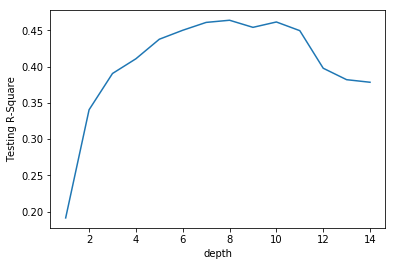

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
x = []
y = []
for i in range(1,15):
    model = tree.DecisionTreeRegressor(max_depth=i)
    model.fit(x_train_1,y_train_1)
    x.append(i)
    y.append(model.score(x_test_1,y_test_1))
    print ("Maximum depth:",i)
    print("Training R-Square",model.score(x_train_1,y_train_1))
    print("Testing R-Square",model.score(x_test_1,y_test_1))
plt.plot(x,y)
plt.xlabel('depth')
plt.ylabel('Testing R-Square')
plt.show()

In [15]:
model_1 = tree.DecisionTreeRegressor(max_depth=8)
model_1.fit(x_train_1,y_train_1)
print ("Maximum depth:",8)
print("Training R-Square",model_1.score(x_train_1,y_train_1))
print("Testing R-Square",model_1.score(x_test_1,y_test_1))

Maximum depth: 8
Training R-Square 0.5417261205289603
Testing R-Square 0.46599612211021246


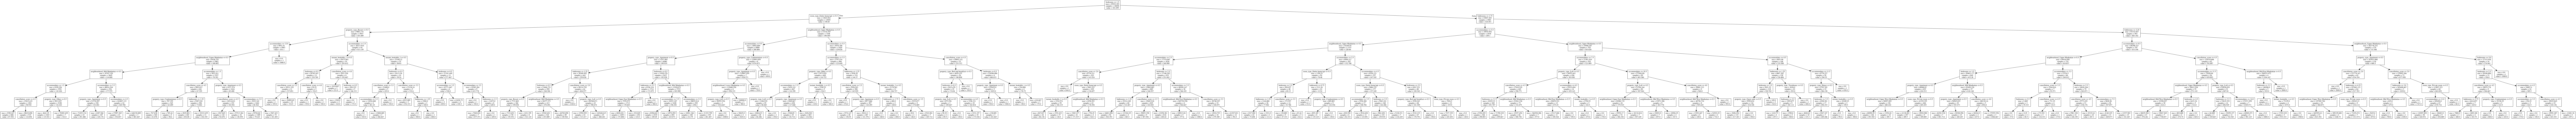

In [16]:
feature_names = ['accommodates', 'bedrooms', 'bathrooms',
           'neighbourhood_Lower Manhattan', 'neighbourhood_Mid East Manhattan',
           'neighbourhood_Mid Manhattan', 'neighbourhood_Mid West Manhattan',
           'neighbourhood_Upper East Manhattan', 'neighbourhood_Upper Manhattan',
           'neighbourhood_Upper West Manhattan', 'property_type_Aparthotel',
           'property_type_Apartment', 'property_type_Bed and breakfast',
           'property_type_Boutique hotel', 'property_type_Condominium',
           'property_type_Guest suite', 'property_type_Hostel',
           'property_type_House', 'property_type_Loft', 'property_type_Other',
           'property_type_Resort', 'property_type_Serviced apartment',
           'property_type_Tiny house', 'property_type_Townhouse',
           'property_type_Villa', 'room_type_Entire home/apt',
           'room_type_Private room', 'room_type_Shared room', 'instant_bookable_f',
           'instant_bookable_t', 'cancellation_score']
from IPython.display import Image
dot_data = tree.export_graphviz(model_1, out_file=None,feature_names=feature_names)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

Text(0.5,0,'Relative Importance')

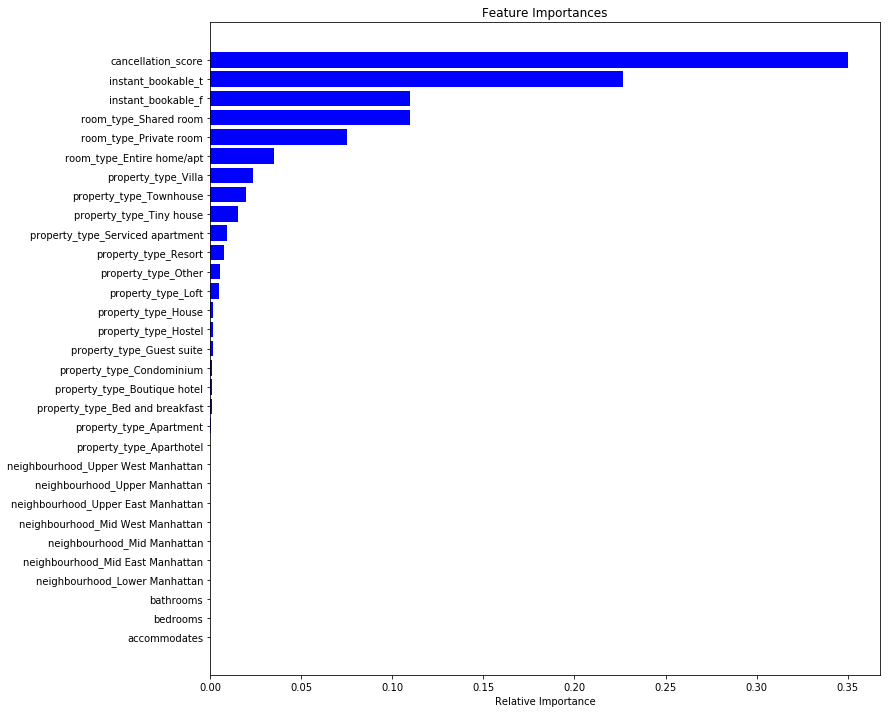

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model_1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

# Classify the Price Into 21 Intervals from 0 - 2000 USD

In [22]:
def price_interval(price):
    interval = np.linspace(0,2000,21)
    for i in range(len(interval)-1):
        if price >= interval[i] and price < interval[i+1]:
            return i
        elif price == 2000:
            return 20
        else:
            continue

In [23]:
df_['price interval'] = df_['price'].apply(price_interval)

# Classifier Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

train_2, test_2 = train_test_split(df_, test_size = 0.3)
x_train_2 = train_2.iloc[0:,0:31]
y_train_2 = train_2[['price interval']]
x_test_2 = test_2.iloc[0:,0:31]
y_test_2 = test_2[['price interval']]

Maximum depth: 1
Training R-Square 0.539419603935733
Testing R-Square 0.5405405405405406
Maximum depth: 2
Training R-Square 0.5493212106115332
Testing R-Square 0.5504213891310665
Maximum depth: 3
Training R-Square 0.5625233528459335
Testing R-Square 0.5598663179308341
Maximum depth: 4
Training R-Square 0.5696226180097148
Testing R-Square 0.5669863411798896
Maximum depth: 5
Training R-Square 0.5715531199402167
Testing R-Square 0.5694565533275211
Maximum depth: 6
Training R-Square 0.582139743430066
Testing R-Square 0.5793374019180471
Maximum depth: 7
Training R-Square 0.5887408145472661
Testing R-Square 0.5789014821272885
Maximum depth: 8
Training R-Square 0.5965250965250966
Testing R-Square 0.5770124963673351
Maximum depth: 9
Training R-Square 0.6094158674803836
Testing R-Square 0.5765765765765766
Maximum depth: 10
Training R-Square 0.6218707186449122
Testing R-Square 0.5790467887242081
Maximum depth: 11
Training R-Square 0.6351974093909578
Testing R-Square 0.5797733217088056
Maximum de

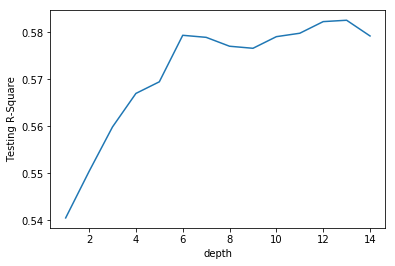

In [31]:
x_ = []
y_ = []

for i in range(1,15):
    model_ = tree.DecisionTreeClassifier(max_depth = i,criterion='entropy')
    model_.fit(x_train_2,y_train_2)
    
    #accuracy = (tp+tn)/(tp+tn+fp+fn)
    x_.append(i)
    y_.append(model_.score(x_test_2,y_test_2))
    print ("Maximum depth:",i)
    print("Training R-Square",model_.score(x_train_2,y_train_2))
    print("Testing R-Square",model_.score(x_test_2,y_test_2))
plt.plot(x_,y_)
plt.xlabel('depth')
plt.ylabel('Testing R-Square')
plt.show()

Maximum depth: 6
Training R-Square 0.5822020176858886
Testing R-Square 0.5789014821272885


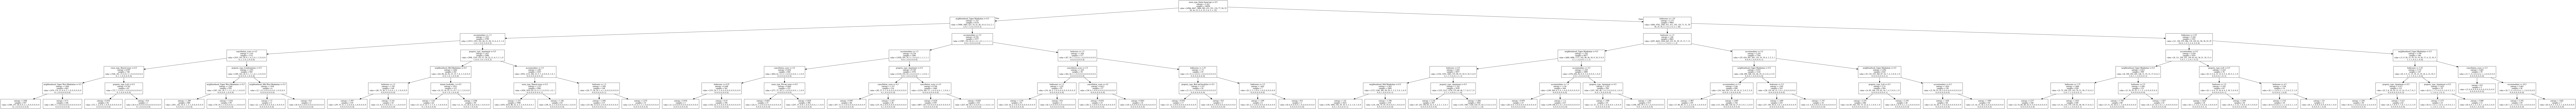

In [35]:
model_2 = tree.DecisionTreeClassifier(max_depth = 6,criterion='entropy')
model_2.fit(x_train_2,y_train_2)
print ("Maximum depth:",6)
print("Training R-Square",model_2.score(x_train_2,y_train_2))
print("Testing R-Square",model_2.score(x_test_2,y_test_2))

feature_names = ['accommodates', 'bedrooms', 'bathrooms',
           'neighbourhood_Lower Manhattan', 'neighbourhood_Mid East Manhattan',
           'neighbourhood_Mid Manhattan', 'neighbourhood_Mid West Manhattan',
           'neighbourhood_Upper East Manhattan', 'neighbourhood_Upper Manhattan',
           'neighbourhood_Upper West Manhattan', 'property_type_Aparthotel',
           'property_type_Apartment', 'property_type_Bed and breakfast',
           'property_type_Boutique hotel', 'property_type_Condominium',
           'property_type_Guest suite', 'property_type_Hostel',
           'property_type_House', 'property_type_Loft', 'property_type_Other',
           'property_type_Resort', 'property_type_Serviced apartment',
           'property_type_Tiny house', 'property_type_Townhouse',
           'property_type_Villa', 'room_type_Entire home/apt',
           'room_type_Private room', 'room_type_Shared room', 'instant_bookable_f',
           'instant_bookable_t', 'cancellation_score']
dot_data = tree.export_graphviz(model_2, out_file=None,feature_names=feature_names) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())



Text(0.5,0,'Relative Importance')

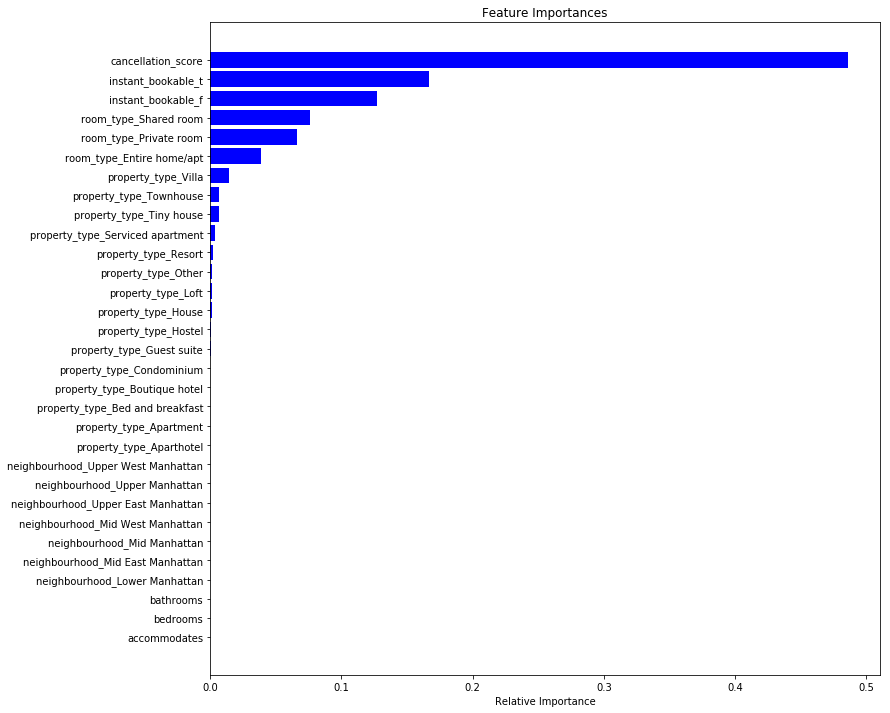

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model_2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

# Random Forest f

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':[10*(i+1) for i in range(5)], #the number of trees
     'max_depth':[2,3,4,5,6,7,8,10,12],
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}
model_3 = GridSearchCV(RandomForestRegressor(),parameters,cv=3,iid=False)
model_3.fit(x_train_1, np.ravel(y_train_1))
model_3.best_score_, model_3.best_params_

(0.4810657874856234,
 {'max_depth': 12,
  'min_samples_leaf': 4,
  'min_samples_split': 8,
  'n_estimators': 50})

In [40]:
from sklearn.ensemble import RandomForestClassifier
parameters = {
     'n_estimators':[10*(i+1) for i in range(10)], #the number of trees
     'max_depth':[2,3,4,5,6,7,8,10,12],
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}
model_4 = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model_4.fit(x_train_2, np.ravel(y_train_2))
model_4.best_score_, model_4.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


(0.5848822288469436,
 {'max_depth': 12,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 60})